In [16]:
# store start time to get execution time of entire script
import time
start_time = time.time()

In [17]:
# helper functions for displaying table data

import numpy as np
from IPython.display import display_html

# n is the number of columns to display data in
def display_side_by_side(series_obj, n):
    df = pd.DataFrame(series_obj)
    partition = int(round(len(df) / n))
    lower_bound = 0
    upper_bound = partition
    args = []
    for i in range(n):
        args.append(df[lower_bound:upper_bound])
        lower_bound += partition
        upper_bound += partition
    helper(args)

def helper(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [18]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

df = pd.read_csv('ILLICIT_RELAPSE_FEB_25_2020_imputed.csv')
df.head()

ID  xobsyr_0 State       City  Region     zipcode  \
0  23223      2010    FL      Miami       4  33133-2436   
1    857      2005    OH  Cleveland       5  44113-1512   
2    929      2006    OH  Cleveland       5  44113-1512   
3    951      2006    OH  Cleveland       5  44113-1512   
4   1032      2006    OH  Cleveland       5  44113-1512   

                    agyaddr  adol  female  nonwhite  unemplmt  B2a_0  noins  \
0      2140 South Dixie Hwy     0      -4       1.0       0.0     19    NaN   
1  1276 West Third St. #400     1       0       0.0       0.0     13    NaN   
2  1276 West Third St. #400     1       0       0.0       0.0     13    NaN   
3  1276 West Third St. #400     1       0       0.0       0.0     13    NaN   
4  1276 West Third St. #400     1       0       0.0       0.0     13    NaN   

   prsatx  tottxp4  TRI_0  TRIg_0  primsev  GVS  gvsg  tsd_0  und15  CWS_0  \
0     NaN        8     -4      -4      NaN    0     0    0.0    NaN     -4   
1     0.0       14      0       0      1.0    7     2    0.0    1.0      0   
2     0.0        9      1       1      1.0    3     1    0.0    1.0      0   
3     0.0        8      1       1      3.0    0     0    0.0    1.0      0   
4     0.0       12      1       1      3.0    4     2    0.0    1.0      0   

   CWSg_0  srprob8  srprobg  S9y10  dldiag  press  DSS9_0  dssg_0    EPS7p_0  \
0      -4      NaN      NaN      8     NaN    NaN       4       1   2.380952   
1       0      1.0      0.0      8     0.0    NaN       5       1  43.650794   
2       0      4.0      1.0      8     1.0    NaN       1       0  14.761905   
3       0      3.0      1.0      8     NaN    NaN       0       0   4.761905   
4       0      3.0      1.0      8     1.0    NaN       2       1  19.523810   

   epsg_0  ADHDs_0  adhdg_0  CDS_0  cdsg_0  suicprbs_0     CJSI_0  cjsig_0  \
0       0        0        0      0       0         0.0   0.000000        0   
1       1        8        1      4       1         0.0   0.000000        0   
2       1        1        0      3       1         0.0  20.000000        1   
3       0        0        0      0       0         0.0  26.666667        1   
4       1        8        1      5       1         0.0   0.000000        0   

   LRI7_0  lrig_0  SRI7_0  srig_0  homeless_0  S6  PSSI_0  pssig_0  RERI13p_0  \
0       9       1       8       1         0.0  -4       0        0       -4.0   
1      11       1      12       2         0.0   0      -3       -3       -3.0   
2       2       0       6       1         0.0   0      -3       -3       -3.0   
3       0       0      11       1         0.0   0      -3       -3       -3.0   
4      14       2      10       1         0.0   1      -3       -3       -8.0   

   rerig_0  ncar    SFS8p_0   SFS8p_3  SFS8p_6  SFS8p_12  loc  loc3  loc5  \
0       -4   1.0  -4.000000  0.000000      0.0       0.0  1.0   1.0   1.0   
1       -3   1.0   0.277778  0.000000      0.0       0.0  1.0   1.0   1.0   
2       -3   0.0   5.555556  2.500000      0.0       0.0  1.0   1.0   1.0   
3       -3   0.0  17.083333  0.416667     12.5       0.0  1.0   1.0   1.0   
4       -8   1.0   8.333333  0.000000      0.0       0.0  1.0   1.0   1.0   

   racegrps  raceg5  Raceg4  famhist  P12e  wkfls  dcfscps  wkyfmp_0  PAI_0  \
0         3       2       2      NaN    -4    0.0      0.0       0.0      0   
1         4       3       1      1.0     0    1.0      1.0       1.0      4   
2         4       3       1      0.0     0    0.0      1.0       0.0      4   
3         4       3       1      1.0     0    0.0      1.0       0.0      4   
4         4       3       1      1.0     0    1.0      1.0       1.0      2   

   PAIg_0  sglpar_0  FPS_0  fpsg_0       POPI  POPIgrp  AFSS_0  afssg_0  \
0       2        -2      0       0  -8.000000       -8       2        1   
1       0         1     -3      -3  40.201005        1       2        1   
2       0         1     -3      -3  -8.000000       -8       0        0   
3       0         1     -3      

In [19]:
np.unique(df['B2a_0']).tolist() # confirm that this dataset contains adolescents AND young adults

[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [20]:
cols_to_use = ['ID','State','City','agyaddr','Illicit_Days5','Illicit_Cens5','adol','xobsyr_0']

# keep imputed columns that didn't have >25% null values 
imputed_cols_to_use = ['female_cd','nonwhite_cd','unemplmt_cd','prsatx_cd','primsev_cd','loc3_cd','gvsg_cd',
                       'CWSg_0_cd','srprobg_cd','dssg_0_cd','epsg_0_cd','adhdg_0_cd','cdsg_0_cd','cjsig_0_cd',
                       'lrig_0_cd','srig_0_cd','SESg_0_cd','r4ag_0_cd']

df = df[cols_to_use + imputed_cols_to_use]
df.head()

ID State       City                   agyaddr  Illicit_Days5  \
0  23223    FL      Miami      2140 South Dixie Hwy            365   
1    857    OH  Cleveland  1276 West Third St. #400            365   
2    929    OH  Cleveland  1276 West Third St. #400            354   
3    951    OH  Cleveland  1276 West Third St. #400            365   
4   1032    OH  Cleveland  1276 West Third St. #400            365   

   Illicit_Cens5  adol  xobsyr_0  female_cd  nonwhite_cd  unemplmt_cd  \
0              2     0      2010          0            1            0   
1              1     1      2005          0            0            0   
2              1     1      2006          0            0            0   
3              2     1      2006          0            0            0   
4              2     1      2006          0            0            0   

   prsatx_cd  primsev_cd  loc3_cd  gvsg_cd  CWSg_0_cd  srprobg_cd  dssg_0_cd  \
0          0           3        1        0          0           1          1   
1          0           1        1        2          0           0          1   
2          0           1        1        1          0           1          0   
3          0           3        1        0          0           1          0   
4          0           3        1        2          0           1          1   

   epsg_0_cd  adhdg_0_cd  cdsg_0_cd  cjsig_0_cd  lrig_0_cd  srig_0_cd  \
0          0           0          0           0          1          1   
1          1           1          1           0          1          2   
2          1           0          1           1          0          1   
3          0           0          0           1          0          1   
4          1           1          1           0          2          1   

   SESg_0_cd  r4ag_0_cd  
0          0          1  
1          0          1  
2          0          2  
3          0          2  
4          0          2

In [21]:
# remove rows that don't have our predictor feature

df = df[df.Illicit_Days5 != ' ']
df.shape

//anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


(24299, 26)

In [22]:
# ad hoc way of getting censoring to be correct
df['Illicit_Cens5'] += 3 # add 3 to prevent overlapping replacement
# no relapse and censored data needs to be censored in the overall model
df.replace({'Illicit_Cens5': {3: 1, 4: 0, 5:0}}, inplace=True) # 3 == relapsed, 4 == no relapse, 5 == censored
df['Illicit_Cens5'].value_counts()

0    19711
1     4588
Name: Illicit_Cens5, dtype: int64

In [23]:
# mark data based on which drugs were most severe for that patient
alcohol_sev = df['primsev_cd'] == 1 # alcohol
marijuana_sev = df['primsev_cd'] == 3 # marijuana
df['nonillicit_flag'] = alcohol_sev + marijuana_sev
df['nonillicit_flag'] = df.nonillicit_flag.astype(int)
df.head()

//anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


ID State       City                   agyaddr  Illicit_Days5  \
0  23223    FL      Miami      2140 South Dixie Hwy            365   
1    857    OH  Cleveland  1276 West Third St. #400            365   
2    929    OH  Cleveland  1276 West Third St. #400            354   
3    951    OH  Cleveland  1276 West Third St. #400            365   
4   1032    OH  Cleveland  1276 West Third St. #400            365   

   Illicit_Cens5  adol  xobsyr_0  female_cd  nonwhite_cd  unemplmt_cd  \
0              0     0      2010          0            1            0   
1              0     1      2005          0            0            0   
2              0     1      2006          0            0            0   
3              0     1      2006          0            0            0   
4              0     1      2006          0            0            0   

   prsatx_cd  primsev_cd  loc3_cd  gvsg_cd  CWSg_0_cd  srprobg_cd  dssg_0_cd  \
0          0           3        1        0          0           1          1   
1          0           1        1        2          0           0          1   
2          0           1        1        1          0           1          0   
3          0           3        1        0          0           1          0   
4          0           3        1        2          0           1          1   

   epsg_0_cd  adhdg_0_cd  cdsg_0_cd  cjsig_0_cd  lrig_0_cd  srig_0_cd  \
0          0           0          0           0          1          1   
1          1           1          1           0          1          2   
2          1           0          1           1          0          1   
3          0           0          0           1          0          1   
4          1           1          1           0          2          1   

   SESg_0_cd  r4ag_0_cd  nonillicit_flag  
0          0          1                1  
1          0          1                1  
2          0          2                1  
3          0          2                1  
4          0          2                1

In [24]:
df['primsev_cd'] = df.primsev_cd.astype(int)

# one-hot encode primsev_cd as it is the only cetegorical variable
one_hot = pd.get_dummies(df['primsev_cd'], prefix='primsev_cd')
df = df.drop('primsev_cd',axis = 1)
df = df.join(one_hot)

df.head()

ID State       City                   agyaddr  Illicit_Days5  \
0  23223    FL      Miami      2140 South Dixie Hwy            365   
1    857    OH  Cleveland  1276 West Third St. #400            365   
2    929    OH  Cleveland  1276 West Third St. #400            354   
3    951    OH  Cleveland  1276 West Third St. #400            365   
4   1032    OH  Cleveland  1276 West Third St. #400            365   

   Illicit_Cens5  adol  xobsyr_0  female_cd  nonwhite_cd  unemplmt_cd  \
0              0     0      2010          0            1            0   
1              0     1      2005          0            0            0   
2              0     1      2006          0            0            0   
3              0     1      2006          0            0            0   
4              0     1      2006          0            0            0   

   prsatx_cd  loc3_cd  gvsg_cd  CWSg_0_cd  srprobg_cd  dssg_0_cd  epsg_0_cd  \
0          0        1        0          0           1          1          0   
1          0        1        2          0           0          1          1   
2          0        1        1          0           1          0          1   
3          0        1        0          0           1          0          0   
4          0        1        2          0           1          1          1   

   adhdg_0_cd  cdsg_0_cd  cjsig_0_cd  lrig_0_cd  srig_0_cd  SESg_0_cd  \
0           0          0           0          1          1          0   
1           1          1           0          1          2          0   
2           0          1           1          0          1          0   
3           0          0           1          0          1          0   
4           1          1           0          2          1          0   

   r4ag_0_cd  nonillicit_flag  primsev_cd_1  primsev_cd_2  primsev_cd_3  \
0          1                1             0             0             1   
1          1                1             1             0             0   
2          2                1             1             0             0   
3          2                1             0             0             1   
4          2                1             0             0             1   

   primsev_cd_4  primsev_cd_5  primsev_cd_6  
0             0             0             0  
1             0             0             0  
2             0             0             0  
3             0             0             0  
4             0             0             0

In [25]:
# subset data based on whether the patient lived at the clinic or not
df = df[df.loc3_cd != 2]
df.drop(columns=['loc3_cd'], inplace=True)
df.shape

(21278, 31)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d448710>]],
      dtype=object)

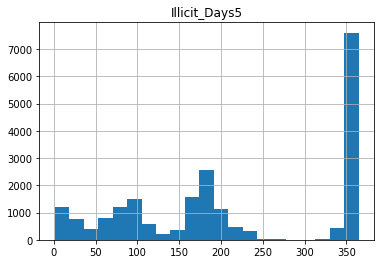

In [26]:
# see distribution of our predictor feature
df.hist(column='Illicit_Days5', bins=21)

In [27]:
df.to_csv('data_cleaned.csv')

In [28]:
# print out total notebook execution time
total_seconds = int(time.time() - start_time)
minutes = total_seconds // 60
seconds = total_seconds % 60
print("--- " + str(minutes) + " minutes " + str(seconds) + " seconds ---")

--- 0 minutes 4 seconds ---
